# **An intensive analysis of consumer behavioral, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.**

# Data

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

# Tasks

## Task 1. Classification (50 points)

Build a predictive classification model using data entries corresponding to the months of **June—December as training set**, and those corresponding to **February—March as test set**. 

More specifically,

1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
1. Report and interpret the most meaningful classifications metrics
1. Show and explain the hyper-parameter fitting process.

Point breakdown:

- (10 points) Basic exploratory data analysis (EDA) 
    - Appropriate univariate descriptive statistics and figures
    - Appropriate bi-variate descriptive statistics and figures
- ( 5 points) Advanced EDA
    - Free-response, shows us what they know! 
- ( 5 points) Train/test split
- (10 points) Feature selection
- (15 points) Model fitting
- ( 5 points) Performance points 

In [1]:
# My personal preference is to have all the libraries at the top.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.utils import validation

 
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

Also setting the random seed. The random seed is _always_ 42.

In [2]:
random_seed = 42
np.random.seed(random_seed)

### EDA and Train/Test Split

Reading in data and checking the head to see if there is a header row.

In [3]:
rawdata = pd.read_csv('dat/online_shoppers_intention.csv.gz')
rawdata.head(5).transpose() 

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


Getting to know the data

In [4]:
rawdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [5]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Initial Observations**

Data contains 12330 entries as decribed in [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset). Data will definitily need normalized and outliers examined and possibly stripped (for example Administrative_Duration has a mean of about 80, a standard deviation of about 176, and a maximum of about 3400 so the spread seems very uneven).



1. First, converting object and bool column data types to numbers

In [6]:
# Copying the data to make changes without changing the initial data.
data = pd.DataFrame.copy(rawdata, deep=True)

print('Weekend counts: ', rawdata['Weekend'].value_counts())
print('\nRevenue counts: ', rawdata['Revenue'].value_counts())

# reference https://statisticsglobe.com/convert-boolean-integer-pandas-dataframe-column-python
data['Weekend'] = data['Weekend'].astype(int) 
data['Revenue'] = data['Revenue'].astype(int)

print('\n\nWeekend counts: ', data['Weekend'].value_counts())
print('\nRevenue counts: ', data['Revenue'].value_counts(), '\n\n\n')

Weekend counts:  False    9462
True     2868
Name: Weekend, dtype: int64

Revenue counts:  False    10422
True      1908
Name: Revenue, dtype: int64


Weekend counts:  0    9462
1    2868
Name: Weekend, dtype: int64

Revenue counts:  0    10422
1     1908
Name: Revenue, dtype: int64 





Checking the information on the rest of the columns.

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Examining the number of variables and values in the remaining object columns.

In [8]:
print('Unique Month: \n', data['Month'].value_counts())
print('\nUnique Visitor Type: \n', data['VisitorType'].value_counts())

Unique Month: 
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Unique Visitor Type: 
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


One hot encoding VisitorType


In [9]:
data_onehot = pd.get_dummies(data, columns = ['VisitorType'])
data_onehot.head().transpose()

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


**`SpecialDay` is odd.**

In [10]:
data_onehot.groupby(['Month', 'SpecialDay'])\
        .agg(count = ('SpecialDay', 'count'))

count
Month SpecialDay       
Aug   0.0           433
Dec   0.0          1727
Feb   0.0           105
      0.2            15
      0.4            21
      0.6            19
      0.8            19
      1.0             5
Jul   0.0           432
June  0.0           288
Mar   0.0          1907
May   0.0          2192
      0.2           163
      0.4           222
      0.6           332
      0.8           306
      1.0           149
Nov   0.0          2998
Oct   0.0           549
Sep   0.0           448

**The `SpecialDay` variable is only non-zero in the months of `Feb` and `May`. The description of the data seemed to indicate that holidays throughout the year would be non-zero. It appears the examples given of Mother’s Day or Valentine's Day are <u>*the only*</u> `SpecialDay`'s indicated.**

**Dropping the `SpecialDay` column.**

In [11]:
data_onehot.drop(columns='SpecialDay', inplace = True)

**Splitting off testing data, so as not to bias further EDA.**

February & March as test set.


In [12]:
test_set = data_onehot[(data_onehot['Month'] == 'Feb') | (data_onehot['Month'] == 'Mar')]
print(test_set.head().transpose(), '\n\n\n')
print(test_set.tail().transpose())

                                 0     1    2         3      4
Administrative                   0     0    0         0      0
Administrative_Duration        0.0   0.0  0.0       0.0    0.0
Informational                    0     0    0         0      0
Informational_Duration         0.0   0.0  0.0       0.0    0.0
ProductRelated                   1     2    1         2     10
ProductRelated_Duration        0.0  64.0  0.0  2.666667  627.5
BounceRates                    0.2   0.0  0.2      0.05   0.02
ExitRates                      0.2   0.1  0.2      0.14   0.05
PageValues                     0.0   0.0  0.0       0.0    0.0
Month                          Feb   Feb  Feb       Feb    Feb
OperatingSystems                 1     2    4         3      3
Browser                          1     2    1         2      3
Region                           1     1    9         2      1
TrafficType                      1     2    3         4      4
Weekend                          0     0    0         0

June thru Dec as train set. (Remembr to remove **May** - thank you Sang for reminding me.)

In [13]:
train_set = data_onehot[~((data_onehot['Month'] == 'Feb') | (data_onehot['Month'] == 'Mar') | (data_onehot['Month'] == 'May'))]
print(train_set.head().transpose(), '\n\n\n')
print(train_set.tail().transpose())

                                     5455        5456       5457         5458  \
Administrative                          0           3          1            6   
Administrative_Duration               0.0        40.2       63.4   618.066667   
Informational                           0           0          0            0   
Informational_Duration                0.0         0.0        0.0          0.0   
ProductRelated                          1          11          3           50   
ProductRelated_Duration        207.570248  201.133333      120.4  1342.083333   
BounceRates                           0.0         0.0        0.0          0.0   
ExitRates                        0.007937        0.02        0.0     0.004386   
PageValues                            0.0         0.0  42.293068     28.06805   
Month                                 Oct        June        Oct         June   
OperatingSystems                        2           2          1            2   
Browser                     

Train set contains the correct months as shown below.

In [14]:
print(train_set.Month.value_counts())

Nov     2998
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Name: Month, dtype: int64


Below the skew and value counts of the data are examined to see if there are any other pecularities such as in `SpecialDay`.

Administrative
Value Counts: 
 0     1125
2      203
1      200
3      155
4      119
5       83
6       61
7       38
8       31
9       27
10      11
11      11
13       8
12       7
14       4
16       2
15       2
18       1
17       1
19       1
24       1
Name: Administrative, dtype: int64


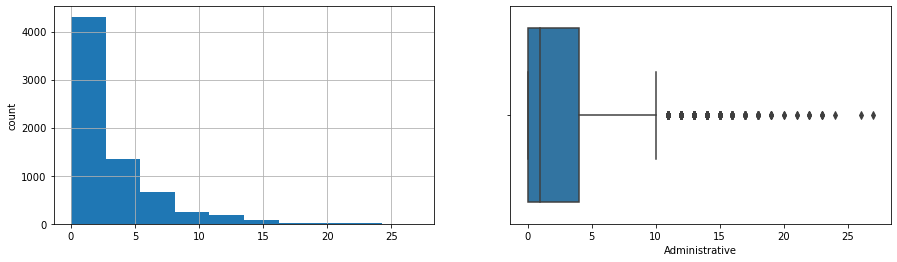


Administrative_Duration
Skew:  5.39


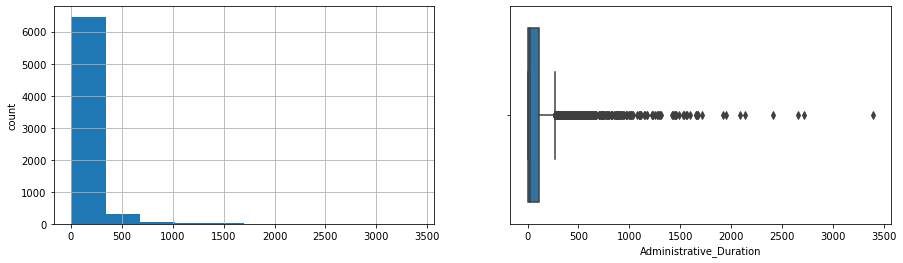


Informational
Value Counts: 
 0     1739
1      162
2       78
3       48
4       27
6       15
5       12
7        3
8        2
16       1
14       1
12       1
9        1
10       1
Name: Informational, dtype: int64


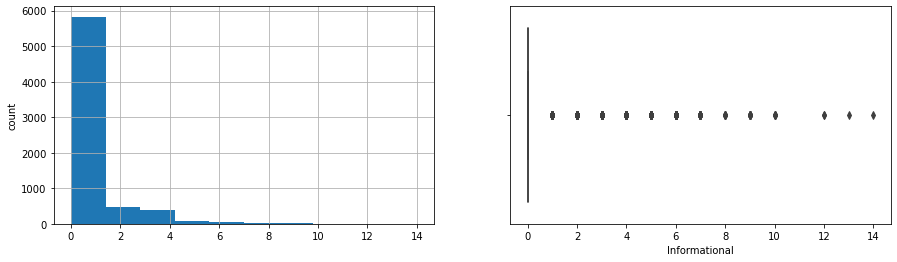


Informational_Duration
Skew:  6.75


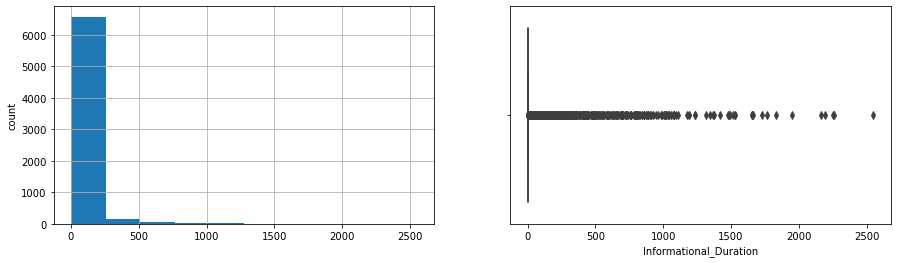


ProductRelated
Value Counts: 
 1      154
2      115
3      111
7       91
6       91
      ... 
128      1
87       1
173      1
258      1
150      1
Name: ProductRelated, Length: 111, dtype: int64


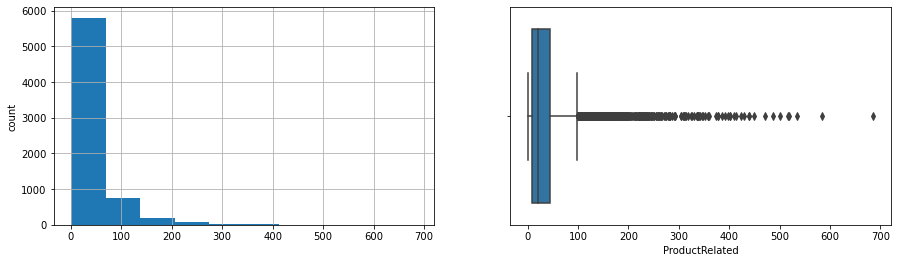


ProductRelated_Duration
Skew:  3.7


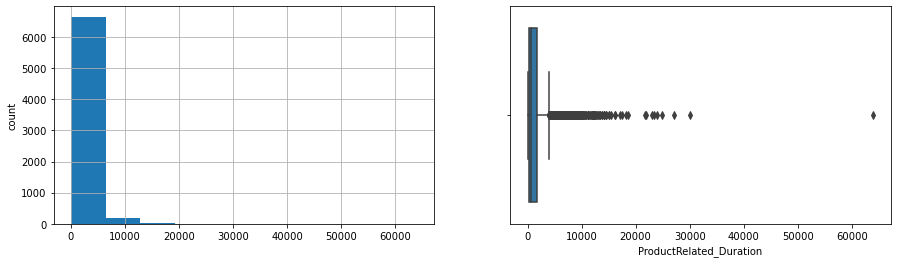


BounceRates
Skew:  2.65


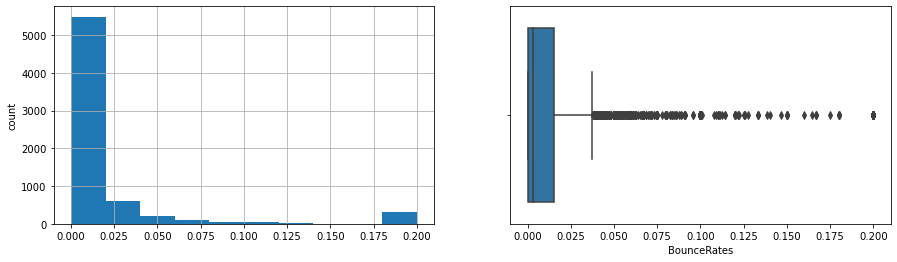


ExitRates
Skew:  1.88


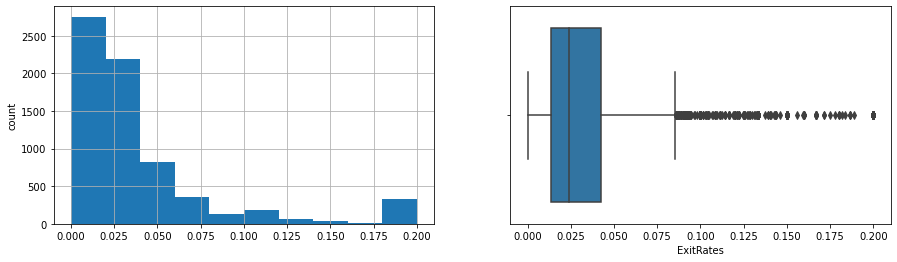


PageValues
Skew:  7.1


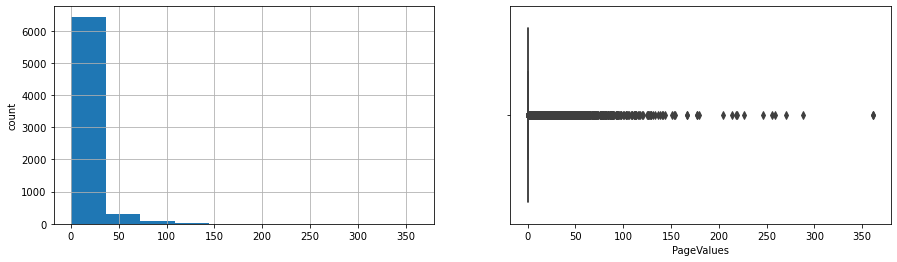


Month
Value Counts: 
 Mar    1907
Feb     184
Name: Month, dtype: int64

OperatingSystems
Value Counts: 
 2    1153
1     445
3     412
4      79
7       2
Name: OperatingSystems, dtype: int64


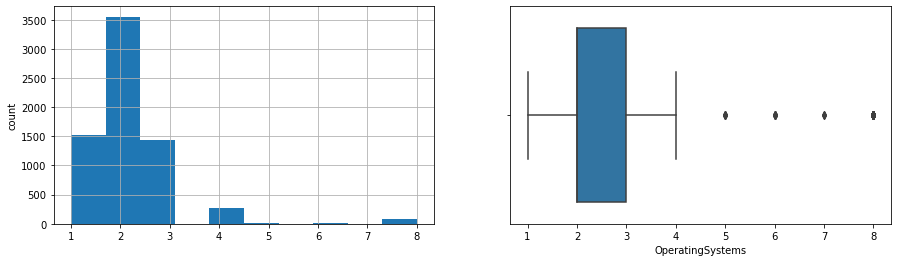


Browser
Value Counts: 
 2     1300
1      437
4      160
5       88
6       42
3       27
10      17
7       10
8        9
9        1
Name: Browser, dtype: int64


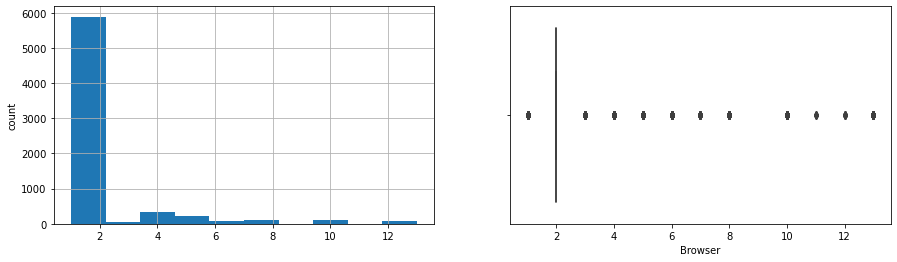


Region
Value Counts: 
 1    863
3    392
2    212
4    172
6    139
7    139
8     73
9     57
5     44
Name: Region, dtype: int64


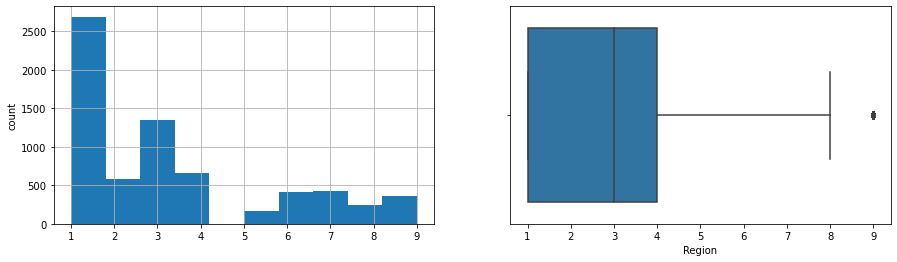


TrafficType
Value Counts: 
 1     689
2     589
3     427
10    132
8      86
9      42
6      38
13     25
4      23
11     22
7       8
5       5
14      2
15      2
12      1
Name: TrafficType, dtype: int64


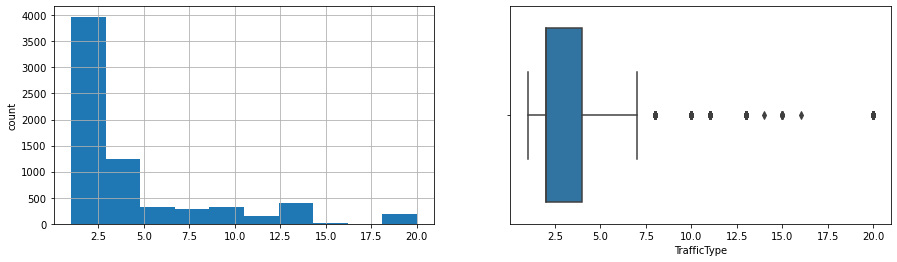


Weekend
Value Counts: 
 0    1582
1     509
Name: Weekend, dtype: int64


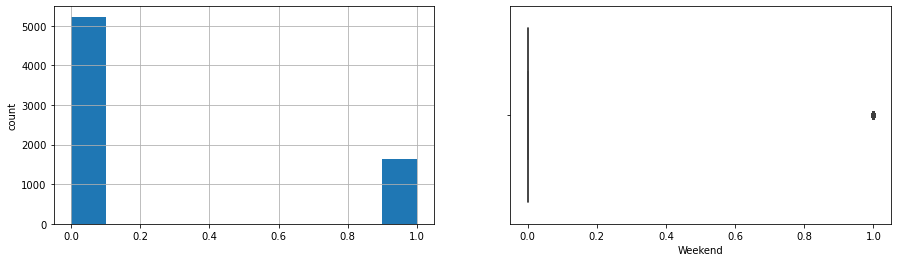


Revenue
Value Counts: 
 0    1896
1     195
Name: Revenue, dtype: int64


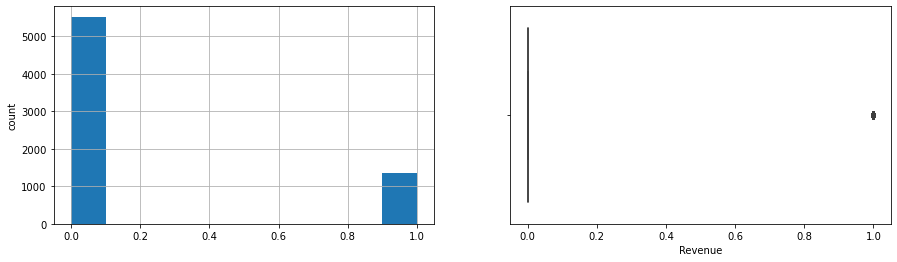


VisitorType_New_Visitor

VisitorType_Other

VisitorType_Returning_Visitor



In [15]:
for col in test_set:
     print(col)
     if test_set[col].dtype == 'O':
          print("Value Counts: \n", test_set[col].value_counts())
     if test_set[col].dtype == 'int64':
          print("Value Counts: \n", test_set[col].value_counts())
          plt.figure(figsize=(15,4))
          plt.subplot(1,2,1)
          train_set[col].hist()
          plt.ylabel('count')
          plt.subplot(1,2,2)
          sns.boxplot(x= train_set[col])
          plt.show()
     if test_set[col].dtype == 'float64':
          print('Skew: ', round(test_set[col].skew(),2))
          plt.figure(figsize=(15,4))
          plt.subplot(1,2,1)
          train_set[col].hist()
          plt.ylabel('count')
          plt.subplot(1,2,2)
          sns.boxplot(x= train_set[col])
          plt.show()
     print()

All of the above plots of the continous and integer variables skew *left*.

 Now removing `Month` as the months in the training set do not appear in the testing set and vice versa.

In [16]:
train_set.drop(axis = 1, columns = 'Month', inplace = True)
test_set.drop(axis = 1, columns = 'Month', inplace = True)

print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6875 entries, 5455 to 12329
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 6875 non-null   int64  
 1   Administrative_Duration        6875 non-null   float64
 2   Informational                  6875 non-null   int64  
 3   Informational_Duration         6875 non-null   float64
 4   ProductRelated                 6875 non-null   int64  
 5   ProductRelated_Duration        6875 non-null   float64
 6   BounceRates                    6875 non-null   float64
 7   ExitRates                      6875 non-null   float64
 8   PageValues                     6875 non-null   float64
 9   OperatingSystems               6875 non-null   int64  
 10  Browser                        6875 non-null   int64  
 11  Region                         6875 non-null   int64  
 12  TrafficType                    6875 non-null

/tmp/ipykernel_16509/3324255064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(axis = 1, columns = 'Month', inplace = True)
/tmp/ipykernel_16509/3324255064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(axis = 1, columns = 'Month', inplace = True)


In [17]:
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 2091 non-null   int64  
 1   Administrative_Duration        2091 non-null   float64
 2   Informational                  2091 non-null   int64  
 3   Informational_Duration         2091 non-null   float64
 4   ProductRelated                 2091 non-null   int64  
 5   ProductRelated_Duration        2091 non-null   float64
 6   BounceRates                    2091 non-null   float64
 7   ExitRates                      2091 non-null   float64
 8   PageValues                     2091 non-null   float64
 9   OperatingSystems               2091 non-null   int64  
 10  Browser                        2091 non-null   int64  
 11  Region                         2091 non-null   int64  
 12  TrafficType                    2091 non-null   i

Examining the train set and test set

In [18]:
train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,6875.0,2.652509,3.558866,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,6875.0,90.741434,185.024829,0.0,0.000000,22.000000,107.800000,3398.750000
Informational,6875.0,0.576727,1.334415,0.0,0.000000,0.000000,0.000000,14.000000
Informational_Duration,6875.0,39.961299,155.978115,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,6875.0,38.154327,52.393435,0.0,9.000000,21.000000,45.000000,686.000000
ProductRelated_Duration,6875.0,1424.355240,2231.381312,0.0,224.779167,710.066667,1746.904342,63973.522230
BounceRates,6875.0,0.019368,0.044370,0.0,0.000000,0.003371,0.015187,0.200000
ExitRates,6875.0,0.038991,0.044806,0.0,0.013800,0.024226,0.042486,0.200000
PageValues,6875.0,6.782225,20.573444,0.0,0.000000,0.000000,0.000000,361.763742
OperatingSystems,6875.0,2.144000,1.006485,1.0,2.000000,2.000000,3.000000,8.000000


In [19]:
test_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,2091.0,1.769488,2.780218,0.000000,0.000000,0.000000,3.000000,24.000000
Administrative_Duration,2091.0,66.448115,167.300840,0.000000,0.000000,0.000000,64.000000,2047.234848
Informational,2091.0,0.391200,1.179976,0.000000,0.000000,0.000000,0.000000,16.000000
Informational_Duration,2091.0,28.184538,115.613729,0.000000,0.000000,0.000000,0.000000,1467.000000
ProductRelated,2091.0,19.049737,22.883550,0.000000,5.000000,12.000000,25.000000,328.000000
ProductRelated_Duration,2091.0,782.252683,1102.819418,0.000000,119.166667,412.000000,1043.672619,12983.787710
BounceRates,2091.0,0.023954,0.054888,0.000000,0.000000,0.000000,0.014286,0.200000
ExitRates,2091.0,0.047200,0.054111,0.000176,0.013333,0.025541,0.052566,0.200000
PageValues,2091.0,3.689593,13.780388,0.000000,0.000000,0.000000,0.000000,261.491286
OperatingSystems,2091.0,2.064562,0.762232,1.000000,2.000000,2.000000,2.000000,7.000000


The data is now split into a training set and a testing set.

##### **It looks like the mean/min/max spread are not evenly split in the two sets between all of the variables. I expect this will cause issues - so avoiding overfitting on the training data will be important.**

#### Now doing some visual analysis of the data

Looking at a few at a time compared to the target variable `Revenue`.

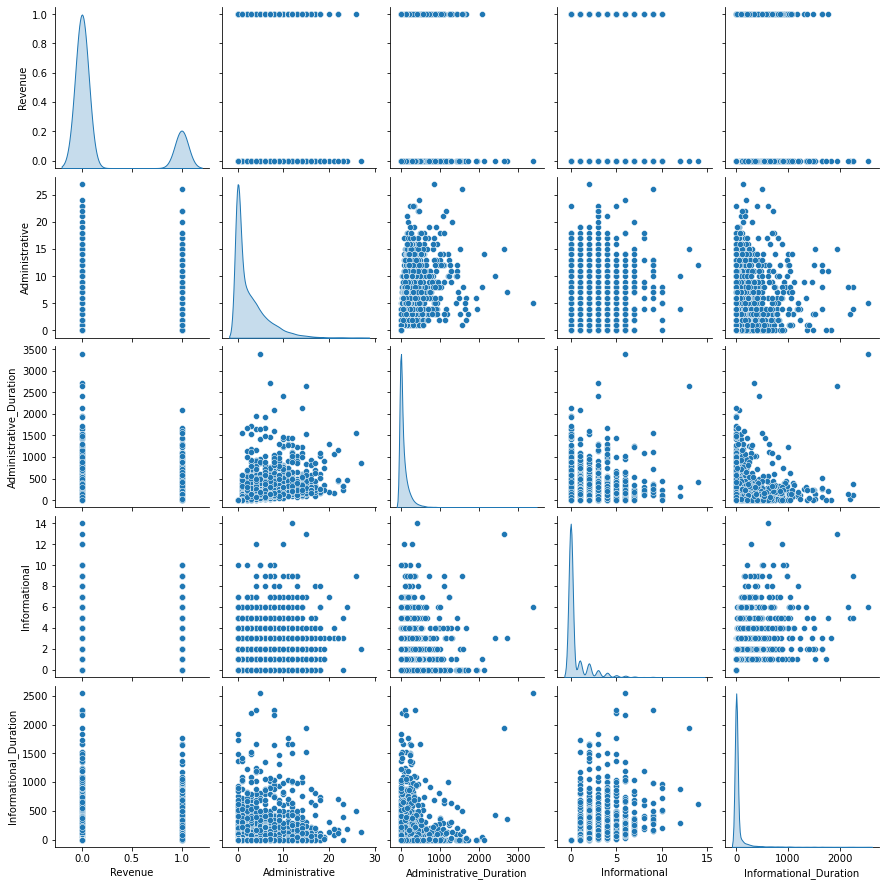

In [20]:
sns.pairplot(train_set[['Revenue', 
                        'Administrative', 
                        'Administrative_Duration', 
                        'Informational',
                        'Informational_Duration']], diag_kind='kde')

There doesn't appear to any strong linear correlation between the variables above.

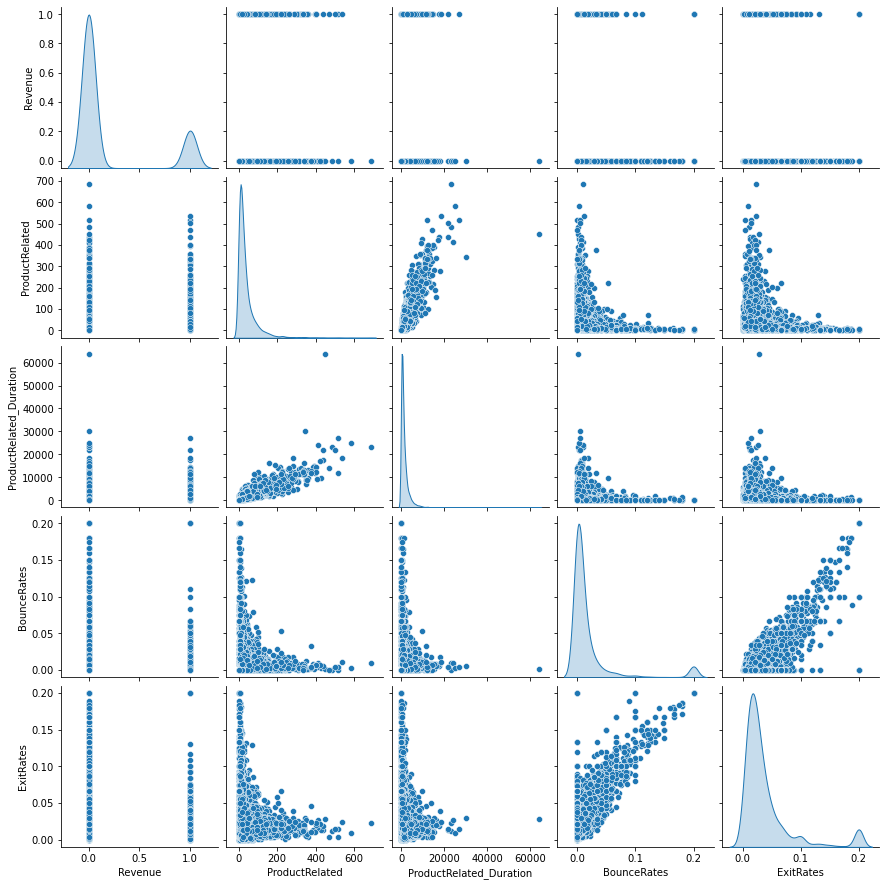

In [21]:

sns.pairplot(train_set[['Revenue', 
                        'ProductRelated', 
                        'ProductRelated_Duration', 
                        'BounceRates',
                        'ExitRates']], diag_kind='kde')

There is a linear correlation between `BounceRates` and `ExitRates`. There is also a linear correlation between `ProductRelated_Duration` and `ProductRelated`.|

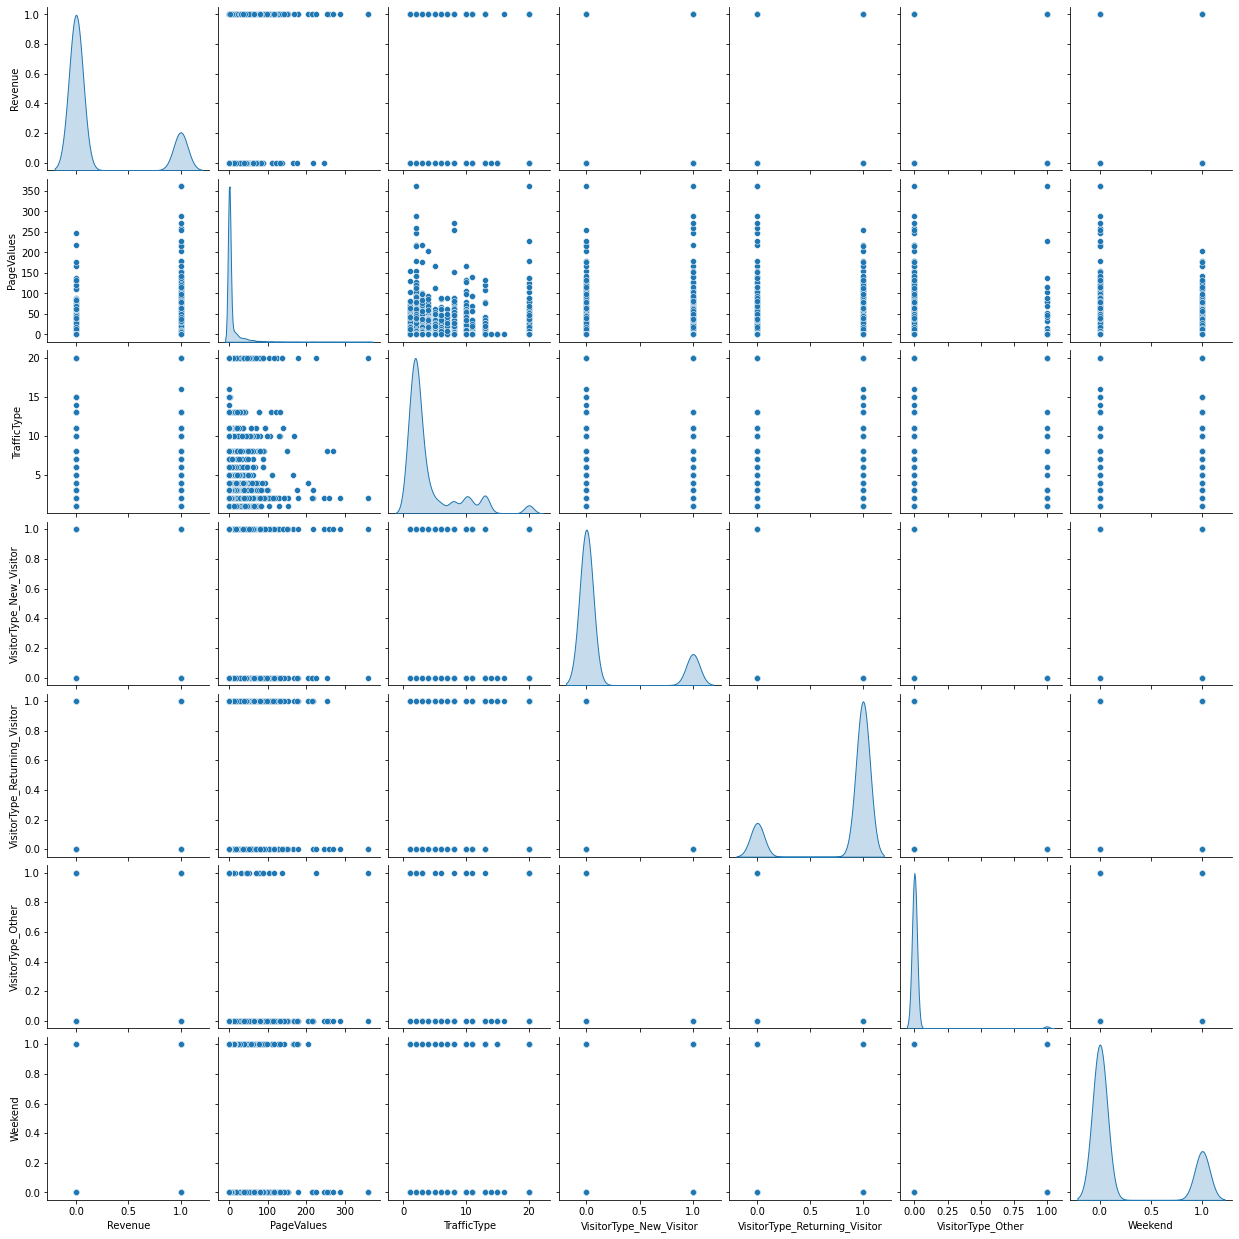

In [22]:
sns.pairplot(train_set[['Revenue', 
                        'PageValues', 
                        'TrafficType',
                        'VisitorType_New_Visitor',
                        'VisitorType_Returning_Visitor',
                        'VisitorType_Other',
                        'Weekend']], diag_kind='kde')

Most of the above pair plot variables are more catergorical, so not much information can be gained from these plots.

#### Feature Selection

It looks like it may be possible to reduce the dimensions of the variables by removing one of the correlated variables in the two variable pairs `BounceRates` & `ExitRates` and  `ProductRelated_Duration` & `ProductRelated`.

Dropping `ProductRelated_Duration` and `BounceRates`.

In [23]:
train_set.drop(['BounceRates', 'ProductRelated_Duration'], inplace = True, axis = 1)
test_set.drop(['BounceRates', 'ProductRelated_Duration'], inplace = True, axis = 1)

/tmp/ipykernel_16509/4058630067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(['BounceRates', 'ProductRelated_Duration'], inplace = True, axis = 1)
/tmp/ipykernel_16509/4058630067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(['BounceRates', 'ProductRelated_Duration'], inplace = True, axis = 1)


Checking the shape of the train and test sets.

In [24]:
print('Train set shape: ', train_set.shape)
print('Test set shape: ', test_set.shape)

Train set shape:  (6875, 16)
Test set shape:  (2091, 16)


Separating out target variable.

In [25]:
y_train = train_set[['Revenue']]
# y_train = validation.column_or_1d(y_train)
X_train = train_set

y_test = test_set[['Revenue']]
# y_test = validation.column_or_1d(y_test)
X_test = test_set

In [26]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

print('y_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (6875, 16)
y_train shape:  (6875, 1)
y_test shape:  (2091, 16)
y_test shape:  (2091, 1)


Using `StanderScaler`.

Fitting the `StandarScaler` to the train set. Applying to both the train and test set.

In [27]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)

train_norm = scaler.transform(X_train)

Xs_train = pd.DataFrame(scaler.transform(X_train), columns=X_test.columns)

In [28]:
Xs_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Checking that the scaling is sufficient.

In [29]:
Xs_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,2091.0,-0.248137,7.812658e-01,-0.745378,-0.745378,-0.745378,0.097648,5.998833
Administrative_Duration,2091.0,-0.131307,9.042733e-01,-0.490464,-0.490464,-0.490464,-0.144539,10.574990
Informational,2091.0,-0.139043,8.843292e-01,-0.432226,-0.432226,-0.432226,-0.432226,11.558921
Informational_Duration,2091.0,-0.075508,7.412715e-01,-0.256217,-0.256217,-0.256217,-0.256217,9.149633
ProductRelated,2091.0,-0.364664,4.367955e-01,-0.728280,-0.632841,-0.499227,-0.251086,5.532501
ExitRates,2091.0,0.183218,1.207740e+00,-0.866355,-0.572676,-0.300196,0.302988,3.593701
PageValues,2091.0,-0.150332,6.698631e-01,-0.329683,-0.329683,-0.329683,-0.329683,12.381378
OperatingSystems,2091.0,-0.078932,7.573758e-01,-1.136712,-0.143083,-0.143083,-0.143083,4.825064
Browser,2091.0,-0.049535,7.506729e-01,-0.735372,-0.200266,-0.200266,-0.200266,4.080583
Region,2091.0,-0.079652,9.427720e-01,-0.888658,-0.888658,-0.484348,0.324271,2.345820


In [30]:
Xs_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,6875.0,1.307108e-15,1.000073,-0.745378,-0.745378,-0.464370,0.378657,6.841859
Administrative_Duration,6875.0,-7.182699e-16,1.000073,-0.490464,-0.490464,-0.371552,0.092203,17.880028
Informational,6875.0,-1.259905e-15,1.000073,-0.432226,-0.432226,-0.432226,-0.432226,10.060027
Informational_Duration,6875.0,5.986807e-16,1.000073,-0.256217,-0.256217,-0.256217,-0.256217,16.089412
ProductRelated,6875.0,-1.200494e-16,1.000073,-0.728280,-0.556490,-0.327437,0.130668,12.365916
ExitRates,6875.0,-8.176086e-17,1.000073,-0.870274,-0.562268,-0.329549,0.078003,3.593701
PageValues,6875.0,3.777181e-17,1.000073,-0.329683,-0.329683,-0.329683,-0.329683,17.255610
OperatingSystems,6875.0,-5.092654e-16,1.000073,-1.136712,-0.143083,-0.143083,0.850547,5.818694
Browser,6875.0,1.344944e-16,1.000073,-0.735372,-0.200266,-0.200266,-0.200266,5.685901
Region,6875.0,-2.551010e-16,1.000073,-0.888658,-0.888658,-0.080039,0.324271,2.345820


In [31]:
y_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,2091.0,0.093257,0.290862,0.0,0.0,0.0,0.0,1.0


In [32]:
y_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,6875.0,0.196073,0.397053,0.0,0.0,0.0,0.0,1.0


Creating a logistic regression model for the data.

In [33]:
log_model = LogisticRegression(C = 100, penalty='l1', class_weight='balanced', solver = 'saga', 
                                max_iter=1000, random_state=random_seed)

In [34]:
log_model.fit(Xs_train, validation.column_or_1d(y_train))

LogisticRegression(C=100, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

Exploring results of the logistic regression.

In [35]:
y_pred = log_model.predict(Xs_test)
y_pred_prob = log_model.predict_proba(Xs_test)

# Accuracy
print('Training accuracy: %.4f' % accuracy_score(y_test, y_pred))
# Classification report
print("Classification report: \n", classification_report(y_test, y_pred))


# train_auc_roc = roc_auc_score(y_train, y_pred_prob)*100

# print('Confusion matrix:\n', confusion_matrix(y_train, y_pred_train))

# print('Training AUC: %.4f %%' % train_auc_roc)

# print('Training accuracy: %.4f %%' % train_accuracy)

Training accuracy: 1.0000
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1896
           1       1.00      1.00      1.00       195

    accuracy                           1.00      2091
   macro avg       1.00      1.00      1.00      2091
weighted avg       1.00      1.00      1.00      2091



***Something is very wrong with the logistic regression - 100% is not possible.***





##  Task 2. Customer Segmentation (25 points)

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. 

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
2. Return plots and cluster images generated for the data.
3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

Point breakdown:

- (15 points) Clustering code
- (10 points) Clustering analysis

## Task 3. Semi-Supervised Learning (15 points)
Consider you have training data with the `Revenue` attribute for records from June—September only. For all records from October—December, however, `Revenue` attribute is missing. Build a semi-supervised self-labeling model to estimate `Revenue` for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

Point breakdown:

- ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
- (8 points) Generate labels for unlabeled samples with a self labeling technique
- (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels

## Style and clarity (10 points). 
Write clear, readable, well-commented code following [PEP8](https://peps.python.org/pep-0008/); also include explanations in markdown cells, where appropriate. 

# Deliverables:
- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.